# TRABALHO FINAL - Sistemas Embarcados
## Análises data set 

https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer#

Activity Recognition from Single Chest-Mounted Accelerometer Data Set


In [ ]:
!pip install -U -q PyDrive

!pip uninstall scikit-learn -y

!pip install -U scikit-learn

!pip install -U scipy


import pandas as pd
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats


import numpy as np

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials
from os.path import exists as file_exists
from scipy.cluster.hierarchy import dendrogram, ward, linkage


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
googleDrive = GoogleDrive(gauth)


drive.mount('/content/gdrive')

Found existing installation: scikit-learn 0.24.2
Uninstalling scikit-learn-0.24.2:
  Successfully uninstalled scikit-learn-0.24.2
  Using cached scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl (22.3 MB)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#leitura do arquivo
!ls "/content/gdrive/MyDrive/Colab Notebooks/"
file = '/content/gdrive/MyDrive/Colab Notebooks/files/1.csv'

 CdiasExercicio2.ipynb
'Cópia de Charts in Colaboratory'
'Cópia de PY0101EN-4-1-ReadFile.ipynb'
 estatistica
 estats
 Exercicio2-parte2.ipynb
 Exercicios-2.ipynb
 files
 ia
 IA-LAB1
 IA-LAB1-OutLiers.ipynb
 IA-Lab2.ipynb
 ImagemCloud.ipynb
 Lista1-IA.ipynb
 lista1.ipynb
 lista2.ipynb
 Lista3-2.ipynb
 lista3.ipynb
 Lista5.ipynb
 medidas_estatisticas.ipynb
 p3-random-forest-tuning-randomizedsearchcv.ipynb
 palavras.txt
 parrot.ipynb
'Política e COVID.ipynb'
'Política e COVID_NOVO.ipynb'
 ProjetoEstat.ipynb
 ProjetoFinalTAAED-v1.ipynb
 RandomForest.ipynb
 SE_IA.ipynb
 step-by-step-kmeans-explained-in-detail.ipynb
 -SupervisedLearning.ipynb
 SupervisedLearning.ipynb
 tempoxclasse.ipynb
'Trabalho de I.A.gdoc'
 TrabalhoFinal.ipynb
 TrabalhoFinal_SE2.ipynb
 TrabalhoFinal_SE.ipynb
 trabalhoIA.ipynb
 Untitled


# DataSet com dados de acelerômetro

In [ ]:
url = file
df = pd.read_csv(url)

df

,indice,x,y,z,movimento
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1
...,...,...,...,...,...
111745,130250.0,1903,2385,1995,7
111746,130250.0,1899,2384,1990,7
111747,130260.0,1909,2384,1992,7
111748,130260.0,1902,2388,1989,7


In [ ]:
valuesDf = df.drop(columns=['indice', 'movimento'], axis=1)
valuesDf.describe()

,x,y,z
count,111750.000000,111750.000000,111750.000000
mean,1916.816260,2379.689315,2046.234577
std,42.958727,37.594662,62.292015
min,1455.000000,1697.000000,994.000000
25%,1888.000000,2374.000000,1993.000000
50%,1908.000000,2380.000000,2023.000000
75%,1961.000000,2386.000000,2113.000000
max,2356.000000,2713.000000,2739.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111750 entries, 0 to 111749
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   indice     111750 non-null  float64
 1   x          111750 non-null  int64  
 2   y          111750 non-null  int64  
 3   z          111750 non-null  int64  
 4   movimento  111750 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 4.3 MB


In [ ]:
df.corr()

,indice,x,y,z,movimento
indice,1.000000,-0.543157,0.106347,-0.790329,0.939338
x,-0.543157,1.000000,-0.138969,0.616953,-0.608727
y,0.106347,-0.138969,1.000000,-0.059686,0.111487
z,-0.790329,0.616953,-0.059686,1.000000,-0.796439
movimento,0.939338,-0.608727,0.111487,-0.796439,1.000000


# Gráficos

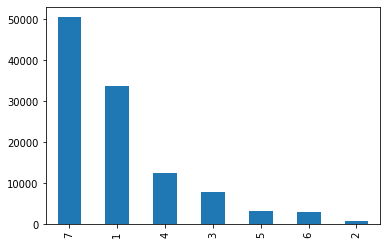

In [ ]:
#number of examples in each class 
%matplotlib inline


df.movimento.value_counts().plot(kind='bar')

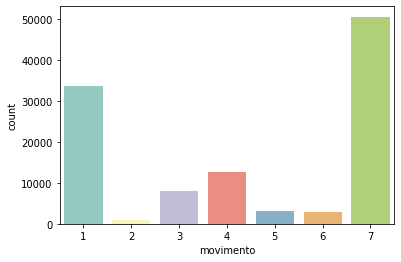

In [ ]:
import seaborn as sns
%matplotlib inline
sns.countplot(x=df['movimento'], palette="Set3")
plt.show()

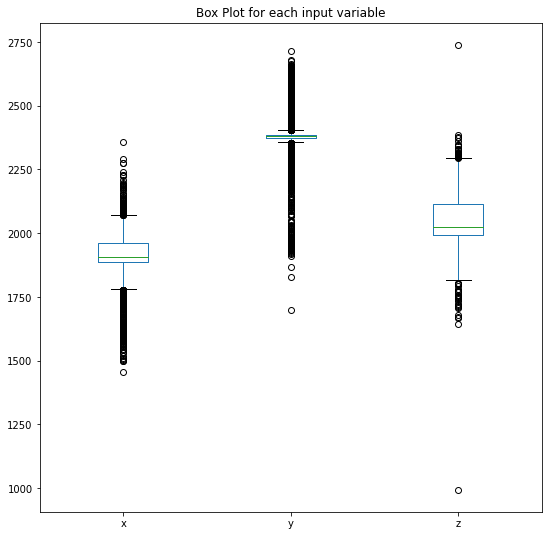

In [ ]:
values = df.drop(columns=['indice', 'movimento'], axis=1)
values.plot(kind='box', subplots=False, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each input variable')
plt.savefig('coordenadas')
plt.show()

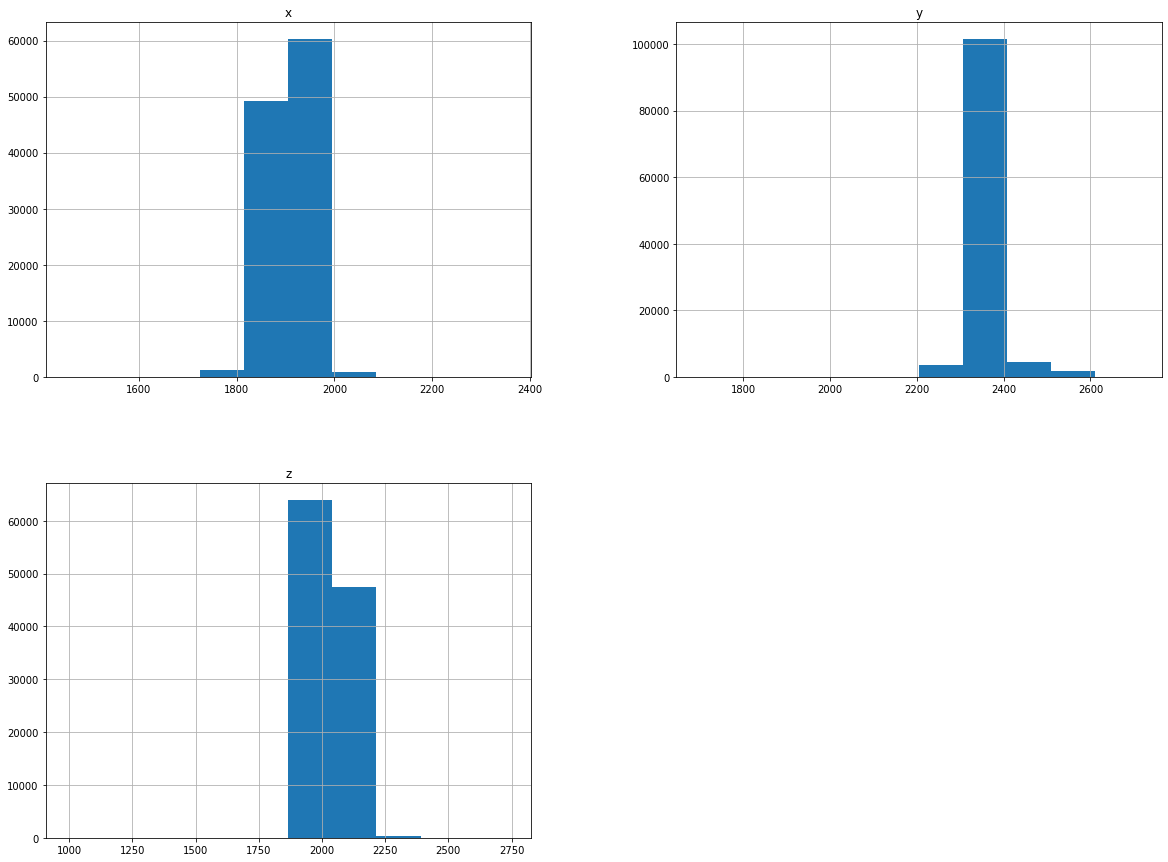

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
values = df.drop(columns=['indice', 'movimento'], axis=1)
values.hist(column=['x', 'y', 'z'], bins=10, figsize=(20,15))
plt.show()

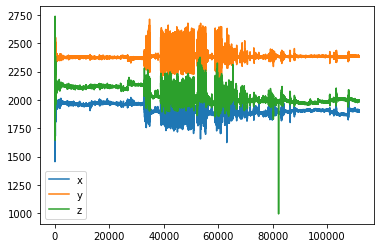

In [ ]:
%matplotlib inline
values = df.drop(columns=['indice', 'movimento'], axis=1)
values.plot()

0         9.656201
1         5.815288
2         7.118871
3         7.351653
4         6.373966
            ...   
111745    0.321619
111746    0.414732
111747    0.181949
111748    0.344897
111749    0.414732
Name: x, Length: 111750, dtype: float64
(array([     0,      1,      2, ..., 111747, 111748, 111749]),)


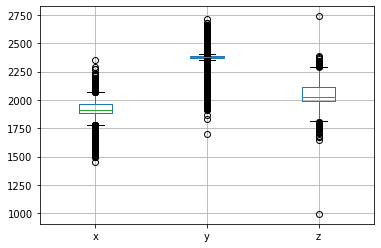

In [ ]:
df.boxplot(column=['x','y','z'])

x=np.abs(stats.zscore(df['x']))
print(x)

threshold = 2000
print(np.where(x < threshold))

df.x = x

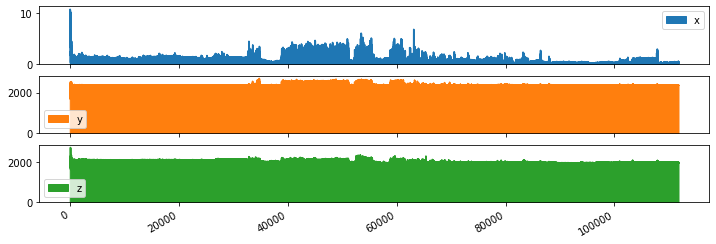

In [ ]:
values = df.drop(columns=['indice', 'movimento'], axis=1)
axs = values.plot.area(figsize=(12, 4), subplots=True)

Text(0, 0.5, 'Movimento')

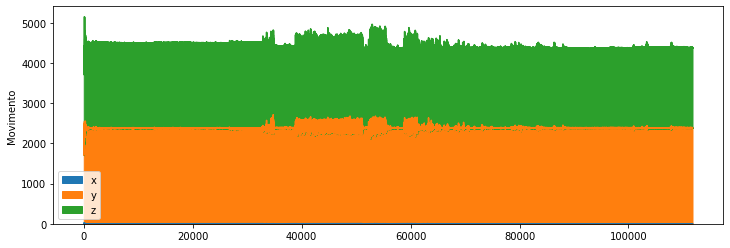

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
values.plot.area(ax=axs)
axs.set_ylabel("Movimento")
#fig.savefig("movimento.png")

## Divisão do conjunto de dados
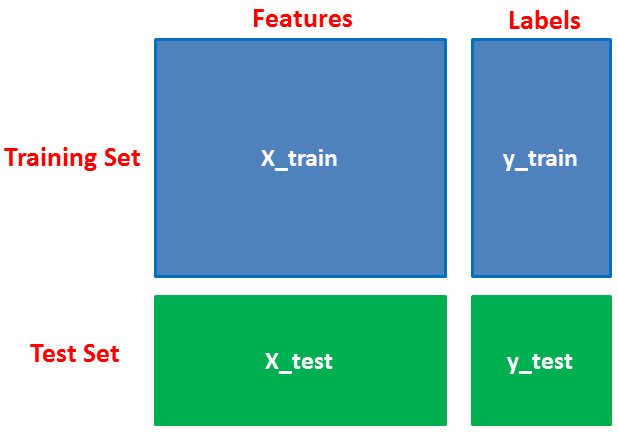


In [ ]:

X = df[['x', 'y', 'z']]
y = df['movimento']

print(X.shape)
print(y.shape)



(111750, 3)
(111750,)


In [ ]:
from sklearn.model_selection import train_test_split
# Divisão do conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#verificar dimensões dos subconjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((78225, 3), (33525, 3), (78225,), (33525,))

# Sumarização dos dados

In [ ]:
print('Quantidade de Movimentos: ', df.movimento.unique())

print(np.bincount(y))
print(df.movimento.value_counts())
#see seaborn chart

print('\n# Qtde. movimento 1 = '+str(len(df.loc[df['movimento'] == 1])))

Quantidade de Movimentos:  [1 2 3 4 5 6 7]
[    0 33677   928  7901 12649  3191  2917 50487]
7    50487
1    33677
4    12649
3     7901
5     3191
6     2917
2      928
Name: movimento, dtype: int64

# Qtde. movimento 1 = 33677


# KMeans

![](https://i.imgur.com/rwkQNbv.png)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Importing the dataset
dataset = pd.read_csv(file)

dataset.isnull().sum()

dataset.drop_duplicates(inplace=True)

In [ ]:
# using only Spending_Score and income variable for easy visualisation
Xmeans = dataset.iloc[:, [1, 3]].values


#linked = linkage(X, 'single')
#labelList = range(1, 11)
#plt.figure(figsize=(10, 7)) dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True)
#plt.show()


The Elbow Method is then used to choose the best K value. In the depiction below we can see that after 3 there's no significant decrease in WCSS so 3 is the best here. Therefore there's an elbow shape that forms and it is usually a good idea to pick the number where this elbow is formed. There would be many times when the graph wouldn't be this intuitive but with practice it becomes easier.

![](https://i.imgur.com/gi9p7V5.png)

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

 
wcss = []

for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    %time kmeans.fit(Xmeans)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)



CPU times: user 367 ms, sys: 215 ms, total: 582 ms
Wall time: 301 ms
CPU times: user 808 ms, sys: 392 ms, total: 1.2 s
Wall time: 617 ms
CPU times: user 1.57 s, sys: 639 ms, total: 2.21 s
Wall time: 1.17 s
CPU times: user 2.71 s, sys: 796 ms, total: 3.5 s
Wall time: 1.81 s
CPU times: user 2.79 s, sys: 918 ms, total: 3.71 s
Wall time: 1.91 s
CPU times: user 2.73 s, sys: 1.01 s, total: 3.74 s
Wall time: 1.92 s


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


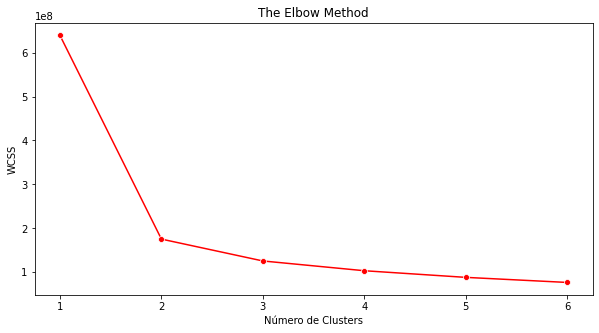

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 7), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Xmeans)

# Visualização KMeans

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

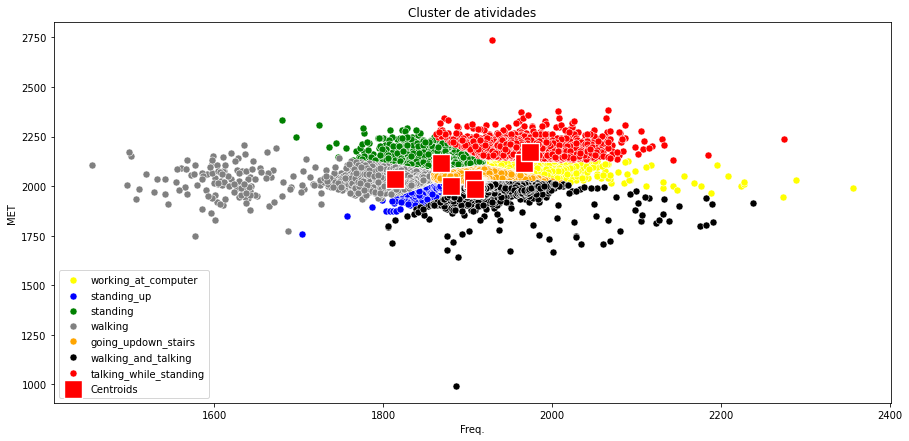

In [ ]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(Xmeans[y_kmeans == 0, 0], Xmeans[y_kmeans == 0, 1], color = 'yellow', label = 'working_at_computer',s=50)
sns.scatterplot(Xmeans[y_kmeans == 1, 0], Xmeans[y_kmeans == 1, 1], color = 'blue', label = 'standing_up',s=50)
sns.scatterplot(Xmeans[y_kmeans == 2, 0], Xmeans[y_kmeans == 2, 1], color = 'green', label = 'standing',s=50)
sns.scatterplot(Xmeans[y_kmeans == 3, 0], Xmeans[y_kmeans == 3, 1], color = 'grey', label = 'walking',s=50)
sns.scatterplot(Xmeans[y_kmeans == 4, 0], Xmeans[y_kmeans == 4, 1], color = 'orange', label = 'going_updown_stairs',s=50)
sns.scatterplot(Xmeans[y_kmeans == 5, 0], Xmeans[y_kmeans == 5, 1], color = 'black', label = 'walking_and_talking',s=50)
sns.scatterplot(Xmeans[y_kmeans == 6, 0], Xmeans[y_kmeans == 6, 1], color = 'red', label = 'talking_while_standing',s=50)


sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=300,marker=',')

plt.grid(False)
plt.title('Cluster de atividades')
plt.xlabel('Freq.')
plt.ylabel('MET')
plt.legend()
plt.show()

In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
print("KNN accuracy on test set: ", knn.score(X_test, y_test))

KNN accuracy on test set:  0.8352572706935123


# Validação Cruzada, Matriz de Confusão e Gráficos

## Validação Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, X, y, cv=10)
print('Cross-validation score with 10 folds:', cv_scores)
print('Mean cross-validation score with 10 folds: {:.3f}'.format(np.mean(cv_scores)))


Cross-validation score with 10 folds: [0.59713647 0.8153915  0.87731544 0.84205817 0.85154362 0.83892617
 0.83069351 0.84277405 0.84438479 0.79373602]
Mean cross-validation score with 10 folds: 0.813


## Matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y, knn.predict(X))
confusion
pd.crosstab(y, knn.predict(X), colnames=['Predita'])

Predita,1,2,3,4,5,6,7
movimento,,,,,,,
1,32879,20,68,405,114,14,177
2,150,136,99,343,38,7,155
3,81,38,3911,508,72,51,3240
4,780,74,388,9760,410,136,1101
5,225,21,50,1310,1172,21,392
6,163,18,246,1644,107,264,475
7,263,73,1520,1275,60,58,47238


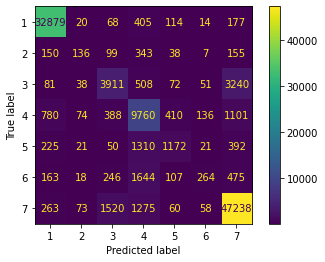

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X, y, values_format = 'd')

### Relatório de classificação

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = knn.predict(X_test)
print("Relatório de classificação: \n", classification_report(y_test, y_pred))  

Relatório de classificação: 
               precision    recall  f1-score   support

           1       0.95      0.97      0.96     10094
           2       0.20      0.08      0.12       288
           3       0.55      0.44      0.49      2342
           4       0.61      0.72      0.66      3790
           5       0.51      0.31      0.39       928
           6       0.34      0.07      0.12       865
           7       0.88      0.92      0.90     15218

    accuracy                           0.84     33525
   macro avg       0.58      0.50      0.52     33525
weighted avg       0.82      0.84      0.82     33525



In [ ]:
evaluate_model(knn)

Train Accuracy : 0.861080217321828
Train Confusion Matrix:
[[23087    11    44   252    76     8   105]
 [  108   112    59   231    25     4   101]
 [   52    21  2873   344    49    24  2196]
 [  522    37   263  7023   256    80   678]
 [  147    17    38   908   880    13   260]
 [  118    15   168  1136    73   203   339]
 [  173    49   956   832    40    39 33180]]
--------------------------------------------------
Test Accuracy : 0.8352572706935123
Test Confusion Matrix:
[[ 9792     9    24   153    38     6    72]
 [   42    24    40   112    13     3    54]
 [   29    17  1038   164    23    27  1044]
 [  258    37   125  2737   154    56   423]
 [   78     4    12   402   292     8   132]
 [   45     3    78   508    34    61   136]
 [   90    24   564   443    20    19 14058]]


In [ ]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,20))
n_neighbors = [3, 5, 11]
p=[1,2]#Convert to dictionary
metric = ['euclidian', 'manhattan']
weights = ['uniform', 'distance']

grid_params = {
    'n_neighbors': [3, 5, 11, 1000]
}


hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, weights = weights) #Create new KNN object


knn_2 = KNeighborsClassifier()#Use GridSearch

clf = GridSearchCV(knn_2, hyperparameters, n_jobs= -1)#Fit the model

best_model = clf.fit(X,y)#Print The value of best Hyperparameters

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

print('Best score:', best_model.best_score_)
print('Best estimator:', best_model.best_estimator_)
print('Best params:', best_model.best_params_)

#Checking performance our model with ROC Score.
#roc_auc_score(y_test, y_pred)

Best leaf_size: 3
Best p: 2
Best n_neighbors: 11
Best score: 0.8104161073825503
Best estimator: KNeighborsClassifier(leaf_size=3, n_neighbors=11)
Best params: {'leaf_size': 3, 'n_neighbors': 11, 'weights': 'uniform'}


In [ ]:
evaluate_model(clf)

Train Accuracy : 0.8553659316075424
Train Confusion Matrix:
[[23023     7    47   283    88    13   122]
 [   98    79    58   269    26     4   106]
 [   48    21  2720   352    46    16  2356]
 [  534    22   240  6946   278    60   779]
 [  151     6    26   980   814    10   276]
 [  108     4   165  1196    75   136   368]
 [  149    33   961   867    30    36 33193]]
--------------------------------------------------
Test Accuracy : 0.8552125279642058
Test Confusion Matrix:
[[ 9827     4    24   133    33     9    64]
 [   39    33    35   111    10     1    59]
 [   21    15  1157   152    19     8   970]
 [  221    15   112  2934   109    17   382]
 [   76     0     7   382   323     3   137]
 [   45     1    74   519    28    75   123]
 [   71    12   409   381    10    13 14322]]
